# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

Iter     Function value   Gradient norm 
     0     3.179052e+01     6.503313e+00
 * time: 0.005640983581542969
     1     2.911527e+01     5.466439e+00
 * time: 0.01626896858215332
     2     2.165599e+01     5.793213e+00
 * time: 0.043695926666259766
     3     1.392972e+01     2.201291e+00
 * time: 0.0757298469543457
     4     1.343499e+01     2.947279e+00
 * time: 0.09719491004943848
     5     1.243569e+01     1.787495e+00
 * time: 0.11937999725341797
     6     1.159043e+01     2.597007e+00
 * time: 0.14348697662353516
     7     1.102858e+01     1.434342e+00
 * time: 0.1643519401550293
     8     1.065595e+01     9.586881e-01
 * time: 0.18532085418701172
     9     1.040170e+01     8.294721e-01
 * time: 0.2073040008544922
    10     1.022114e+01     5.998313e-01
 * time: 0.22765278816223145
    11     1.012000e+01     6.289135e-01
 * time: 0.24974989891052246
    12     1.011547e+01     8.545408e-01
 * time: 0.2665998935699463
    13     1.009836e+01     5.585988e-01
 * time: 0

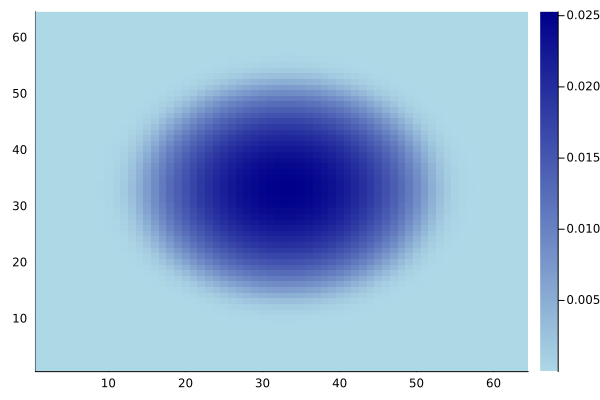

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential, and magnetic vector potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);


# Parameters
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

# Collect all the terms, build and run the model
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)